<a href="https://colab.research.google.com/github/EverlongQQQ/speaker-lab/blob/main/notebooks/01_fetures_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1️⃣ Connect Google Drive and implement paths

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)

PROJECT_PATH = "/content/drive/MyDrive/speaker_lab_drive"
DATA_PATH = os.path.join(PROJECT_PATH, "data")
NOTEBOOKS_PATH = os.path.join(PROJECT_PATH, "notebooks")
os.makedirs(DATA_PATH, exist_ok=True)
os.makedirs(NOTEBOOKS_PATH, exist_ok=True)

print("Project path:", PROJECT_PATH)
print("Data path:", DATA_PATH)

Mounted at /content/drive
Project path: /content/drive/MyDrive/speaker_lab_drive
Data path: /content/drive/MyDrive/speaker_lab_drive/data


# 2️⃣ Imports

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import euclidean

# 3️⃣ Fuctions for visualisation and exporting some values

In [3]:
def plot_waveform(y, sr, title="Waveform"):
    plt.figure(figsize=(14, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(title)
    plt.show()

def plot_spectrogram(y, sr, title="Mel Spectrogram", n_mels=64):
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    S_dB = librosa.power_to_db(S, ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

def plot_mfcc(y, sr, title="MFCC", n_mfcc=13):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title(title)
    plt.show()
    return mfccs

# 4️⃣ Uploading two audio files for example

In [5]:
audio1_path = os.path.join(DATA_PATH, "gc.wav")
audio2_path = os.path.join(DATA_PATH, "fifths.wav")

y1, sr1 = librosa.load(audio1_path, sr=16000)
y2, sr2 = librosa.load(audio2_path, sr=16000)

# 5️⃣ Visualisation

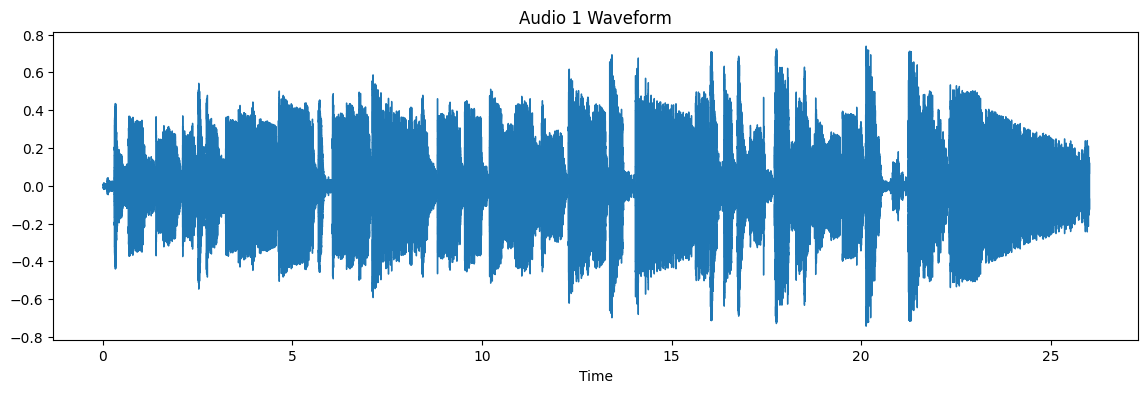

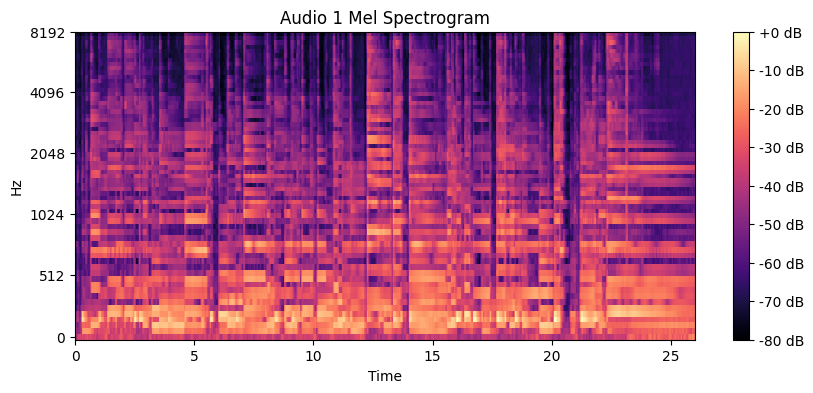

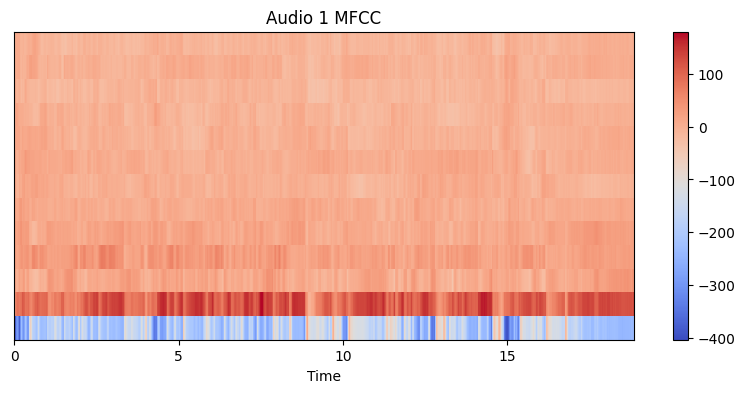

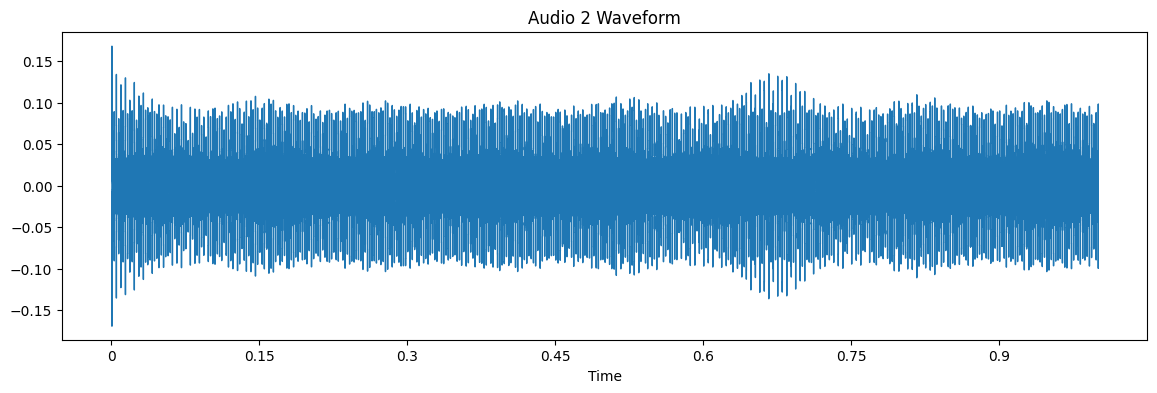

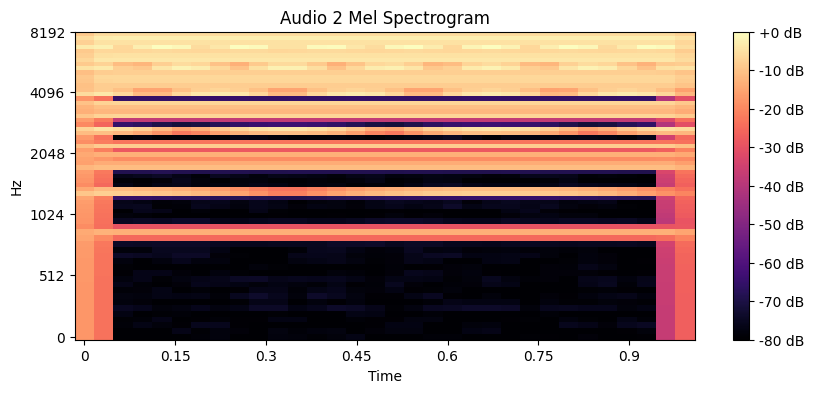

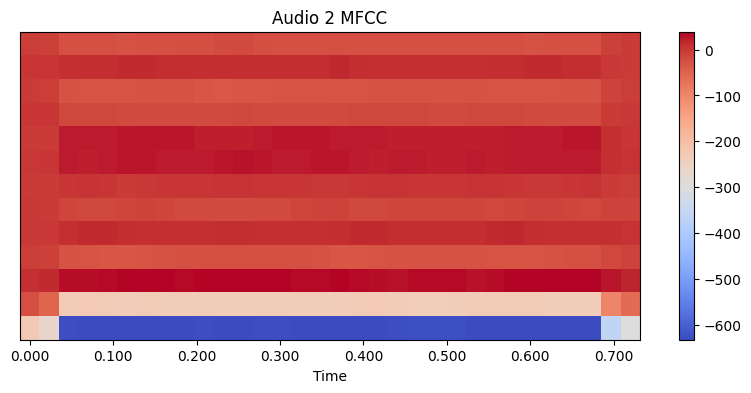

In [6]:
plot_waveform(y1, sr1, title="Audio 1 Waveform")
plot_spectrogram(y1, sr1, title="Audio 1 Mel Spectrogram")
mfcc1 = plot_mfcc(y1, sr1, title="Audio 1 MFCC")

plot_waveform(y2, sr2, title="Audio 2 Waveform")
plot_spectrogram(y2, sr2, title="Audio 2 Mel Spectrogram")
mfcc2 = plot_mfcc(y2, sr2, title="Audio 2 MFCC")

# 6️⃣ Easy comparation of those two audio files
We take the average by time for every MFCC frame

In [8]:
mfcc1_mean = np.mean(mfcc1, axis=1)
mfcc2_mean = np.mean(mfcc2, axis=1)

distance = euclidean(mfcc1_mean, mfcc2_mean)
print(f"Euclidean distance between Audio 1 and Audio 2 (MFCC mean): {distance:.4f}")

if distance < 50:
    print("Voices are a bit same (by MFCC mean)")
else:
    print("Voices are different (by MFCC mean)")

Euclidean distance between Audio 1 and Audio 2 (MFCC mean): 516.7947
Voices are different (by MFCC mean)
